# Derin Öğrenmenin Matematiksel Temelleri

Tensör veri öğrenmesinin en temel veri yapısıdır. Bunlar derecelerine (boyutlarına) göre sınıflandırılabilirler. Bir tensörün 3 anahtar özelliği vardır.

* ***Derecesi:*** Python içerisinde <code>ndim</code> ile öğrenebildiğimiz boyut sayısıdır.
* ***Şekli:*** Her veri noktasında kaç boyut olduğu belirten sayıdır. Python içerisinde <code>shape</code> ile görebiliriz. Aşağıdaki 3B tensör örneğimizde şekil (4,2,3) olarak verilmiştir. 
* ***Veri Tipi:*** Tensörün taşıdığı verinin tipidir.Tensörler genellikle sayı veri tiplerinde veri taşırlar. string veri tipini taşıyamazlar. Çünkü tensörler başta hafızada bitişik olarak yer alırlar. string veri tipinin uzunluğu değişken olduğu için tensörler içinde barındırılamazlar. Python içerisinde <code>dtype</code> ile veri tipini görebiliriz.

***Skaler (0B Tensörler)***

In [1]:
import numpy as np
x=np.array(12)
x

array(12)

In [2]:
x.ndim # ndim bir objenin boyutunu verir.

0

***Vektörler (1B Tensörler)***

In [3]:
x=np.array([1,2,3,4])

In [4]:
x

array([1, 2, 3, 4])

In [5]:
x.ndim

1

***Matrisler (2B Tensörler)***

In [6]:
x=np.array([[1,2,3,4],[5,6,7,8],[9,1,3,4]])

In [7]:
x

array([[1, 2, 3, 4],
       [5, 6, 7, 8],
       [9, 1, 3, 4]])

In [8]:
x.ndim

2

***3B ve daha fazla boyutlu tesnsörler***

Bunlar matrislerden oluşan arraylerdir. 

In [9]:
x=np.array([[[1,2,4],[2,3,4]],[[5,6,4],[8,9,4]],[[1,2,4],[2,3,4]],[[1,2,4],[2,3,4]]])

In [10]:
print(x)

[[[1 2 4]
  [2 3 4]]

 [[5 6 4]
  [8 9 4]]

 [[1 2 4]
  [2 3 4]]

 [[1 2 4]
  [2 3 4]]]


In [11]:
x.ndim

3

Yukarıdaki gibi 3B'lu matrisleri birleştirerek 4B'lu tensörler elde edebiliriz. 

In [12]:
x.shape

(4, 2, 3)

***Örnek 1***

Önce örnek veri setini yükleyelim

In [13]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

Using TensorFlow backend.


In [14]:
print(train_images.ndim) # Tensörün kaçıncı dereceden (boyutlu yada eksen sayısının) olduğunu görelim

3


In [15]:
print(train_images.shape) # Şeklini gördük. 60.000 adet 28*28 matristen oluşan bir tensör olduğunu gördük.

(60000, 28, 28)


In [16]:
print(train_images.dtype) # 8 bitlik tam sayılar taşıyan 3B bir tensörümüz olduğunu gördük.

uint8


## Tensörü bölmek 
Tensör içindeki verilerden bir tanesine bakalım

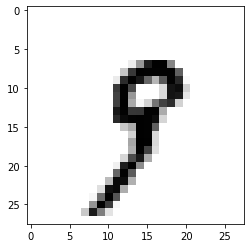

In [17]:
digit=train_images[19]

import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

Bir tensör içerisinden belirli bir kısmını alıp bir işlem yapmak işine yukarıdaki gibi tensörü bölmek (slicing) denir. Bunun için tensörün her boyutunun belirli index aralıkları yazılarak içerisindeki ilgili kısım alınarak operasyona sokulabilir. 

In [18]:
my_slice=train_images[10:100]

In [19]:
my_slice.shape

(90, 28, 28)

Yukarıdaki yeni tensör boyut sayısı arttırılarak da yazılabilir

In [20]:
my_slice=train_images[10:100,:,:]

In [21]:
my_slice.shape

(90, 28, 28)

In [22]:
my_slice=train_images[10:100,0:28,0:28]

In [23]:
my_slice.shape

(90, 28, 28)

In [24]:
my_slice=train_images[:,19:0,19:0]

In [25]:
my_slice.shape

(60000, 0, 0)

***Veri Yığını (Batch) notasyonu***

Tensörlerin ilk ekseni (0 indeksli eksen) örnek eksenidir. Derin öğrenmede modeller tüm veri bir seferde okutularak eğitilmezler. Küçük yığınlara ayrılırlar. Bunlara ***batch*** denir.

In [26]:
batch=train_images[:128] # büyüklüğü 128 olan bir batch yarattık. Birinci batch

In [27]:
batch=train_images[128:256] # burada bir sonraki büyüklüğü olan ikinci bir batch yaratmış olduk. İkinci batch

In [28]:
#batch=train_images[128*n:128*(n+1)] # n. batch

***(relu) eleman bazlı işlem***

Keras içersinde bir katman <code>keras.layer.Dense(512, activation="relu"</code>  şeklinde tanımlanır. Burada geçen  ***relu*** şöyle bir <code>output=relu(dot(W,input)+b)</code> fonksiyondur. Buradaki fonksiyon verilmiş olan W matrisi ile input matrisinin çarpımının b vektörü ile toplamından oluşan tensörün maximum değeridir.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [30]:
#relu'nun numpy kullanılarak yazılması
x=[[1,2],[3,4]]
y=[[5,6],[7,8]]
z=np.dot(x,y)
relu=np.maximum(z,0.)
relu

array([[19., 22.],
       [43., 50.]])

In [31]:
z


array([[19, 22],
       [43, 50]])

In [32]:
def naive_add_matrix_and_vector(x,y): # Matriks ie vektörün toplamını yapan fonksiyon
    assert len(x.shape)==2 # x 2B Numpy vektörü
    assert len(y.shape)==1 # y 1B Numpy vektörü
    assert x.shape[1]==y.shape[0]
    
    x=x.copy() # Girdinin üzerine yazmak için
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[j]
    return x


In [33]:
x=np.random.random((64,3,32,10)) # 4B bir rastgele sayılardan oluşan bir tensör yarattık.

In [34]:
x.shape

(64, 3, 32, 10)

In [35]:
x.ndim

4

In [36]:
x.size

61440

In [37]:
y=np.random.random((32,10)) # 2B bir tensör

In [38]:
y.shape

(32, 10)

In [39]:
y.ndim

2

In [40]:
y.size

320

In [41]:
z=np.maximum(x,y)

In [42]:
z.size

61440